### Работу выполняли
**Соколов Ян\
Екимов Егор\
Токкожин Арсен**

# Домашнее задание 1
## Sentiment Analysis in Russian

*deadline*: 2 октября 2022, 23:59

В этом домашнем задании вы будете работать с корпусом новостных текстов на русском языке. Корпус собран из заметок новостных сайтов с указанием на тональность данного текста.

Корпус описан и представлен по ссылке: https://www.kaggle.com/competitions/sentiment-analysis-in-russian/data

Части 1, 2 задания должны быть выполнены на полных текстах, Часть 3 – на разбиении на тестовое, отладочное и обучающее множества (которое вы должно произвести самостоятельно). Тестовое множество должно быть использовано исключительно для тестирования моделей, обучающее и отладочное – для выбора модели и параметров. 


## ПРАВИЛА
1. Домашнее задание выполняется в группе до 3-х человек.
2. Домашнее задание оформляется в виде отчета либо в .pdf файле, либо jupyter-тетрадке. 
3. Отчет должен содержать: имена всех членов группы, нумерацию заданий и пунктов, которые вы выполнили, код решения, и понятное пошаговое описание того, что вы сделали. Отчет должен быть написан в академическом стиле, без излишнего использования сленга и с соблюдением норм русского языка.
4. Не стоит копировать фрагменты лекций, статей и Википедии в ваш отчет.
5. Отчеты, состоящие исключительно из кода, не будут проверены и будут автоматически оценены нулевой оценкой.
6. Плагиат и любое недобросовестное цитирование приводит к обнулению оценки. 

In [42]:
# !pip install -r requirements.txt

In [1]:
# !unzip sentiment-analysis-in-russian.zip

## Часть 1. [2 балла] Эксплоративный анализ 
1. Найдите топ-300 слов по частоте без учета стоп-слов.
2. Найдите топ слов, характеризующих каждую тональность отдельно. 

[бонус] Постройте тематическую модель по данному корпусу.

[бонус] Найдите еще что-то интересное в корпусе (что-то специфичное для данной темы)

In [68]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [69]:
## считаем данные

df = pd.read_json('train.json')
df_kaggle = pd.read_json('test.json')
df.head()

,text,id,sentiment
0,Досудебное расследование по факту покупки ЕНПФ...,1945,negative
1,Медики рассказали о состоянии пострадавшего му...,1957,negative
2,"Прошел почти год, как железнодорожным оператор...",1969,negative
3,По итогам 12 месяцев 2016 года на территории р...,1973,negative
4,Астана. 21 ноября. Kazakhstan Today - Агентств...,1975,negative


In [70]:
## посмотрим на распределение классов
(df['sentiment'].value_counts(normalize=True) * 100).astype(int)

neutral     48
positive    33
negative    17
Name: sentiment, dtype: int64

In [71]:
df.sample(1).iloc[0]['text']

'Трое молодых людей ловко провернули аферу, получив дубликат sim-карты Ксеll и предоставив поддельную доверенность от нотариуса. В АТФБанке подвоха не заметили.\n'

In [72]:
## создадим колонку text_tokenized с очищенным от пунктуации и стоп слов текстом
## и токенизируем его с помощью word_tokenize из библиотеки nltk

noise = stopwords.words('russian') + list(punctuation) + ['«', '»', '``', '\'\'', '–', '—']

## train
df['text_tokenized'] = df['text'].str.lower().str.strip().apply(lambda x: word_tokenize(x, language='russian'))
df['text_tokenized'] = df['text_tokenized'].apply(lambda x: [w for w in x if w not in noise])

## test
df_kaggle['text_tokenized'] = df_kaggle['text'].str.lower().str.strip().apply(lambda x: word_tokenize(x, language='russian'))
df_kaggle['text_tokenized'] = df_kaggle['text_tokenized'].apply(lambda x: [w for w in x if w not in noise])


## Топ 300 слов

In [73]:
## найдем топ 300 слов по встречаемости во всех предложениях
top300 = df['text_tokenized'].explode().value_counts().head(300)
top20 = top300.head(20)
top300

года        22765
тенге       15326
это         13620
году        11196
также       10934
            ...  
сентября     1160
момент       1160
являются     1158
текущего     1155
работе       1150
Name: text_tokenized, Length: 300, dtype: int64

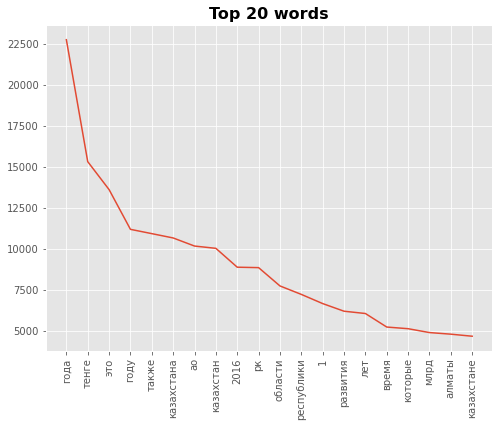

In [74]:
## график топ 20 слов по встречаемости во всех предложениях

plt.figure(figsize=(8, 6))
plt.title('Top 20 words', weight='bold', size=16)
plt.plot(top20)
plt.xticks(top20.index, rotation=90)
plt.show()

**Вывод:**  топ слов показывает нам что речь в текстах идет возможно об экономике Казахстана 2016 года

/var/folders/7r/3bj773_x3qv873q1y8mhs8yh0000gn/T/ipykernel_29677/1121671770.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(df_sent.get(val).index, rotation=90)


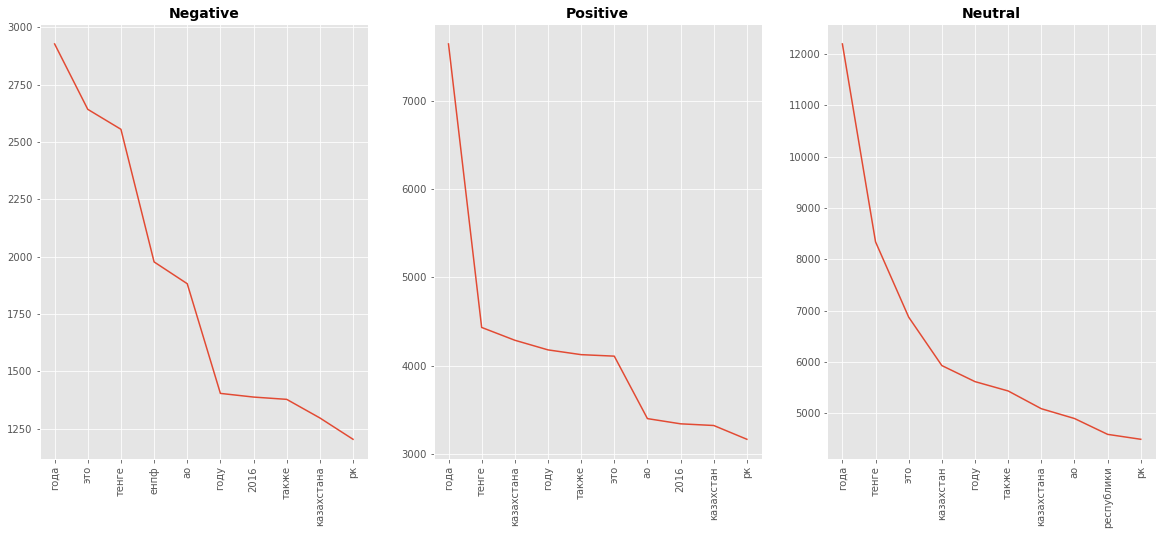

In [75]:
## топ 10 слов для каждой тональности

df_sent = df.groupby(['sentiment']).apply(lambda x: x['text_tokenized'].explode().value_counts().head(10))

fig, axs = plt.subplots(1, 3, figsize=(20, 8))
for i, val in enumerate(df['sentiment'].unique()):
    axs[i].plot(df_sent.get(val))
    axs[i].set_xticklabels(df_sent.get(val).index, rotation=90)
    axs[i].set_title(val.capitalize(), weight='bold', size=14)

**Вывод:**  топ слов примено одинаковый во всех категориях, за исключением слова "енпф" в негативных текстах.

In [76]:
(df['sentiment'].value_counts(normalize=True) * 100).astype(int).apply(lambda x: f'{x}%')

neutral     48%
positive    33%
negative    17%
Name: sentiment, dtype: object

## Часть 2. [2 балла] Модели представления слов 
Обучите модель представления слов (word2vec, GloVe, fastText или любую другую) на материале корпуса.
1. Продемонстрируйте, как работает поиск синонимов, ассоциаций, лишних слов в обученной модели. 
2. Визуализируйте топ-300 слов по частоте без учета стоп-слов (п. 1.1) с помощью TSNE или UMAP (https://umap-learn.readthedocs.io).

In [77]:
import gensim
from gensim.models import word2vec
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from nltk import FreqDist
from tqdm.notebook import tqdm
from sklearn.manifold import TSNE


In [78]:
## используем модель Word2Vec

w2v = word2vec.Word2Vec(sentences=df['text_tokenized'])

In [79]:
## посмотрим на поиск синоноимов в обученной модели

for anything in df['text_tokenized'].explode().sample(3):
    print(anything)
    if anything in w2v.wv.key_to_index.keys():
        for word, sim in w2v.wv.most_similar(positive=anything, topn=5):
            print(word, ': ', sim)
        print('\n')

тесты
трамваев :  0.898883044719696
тестов :  0.893265426158905
существовавших :  0.8892338871955872
композиции :  0.8862087726593018
павлодарских :  0.8838459849357605


12
17 :  0.9071356058120728
18 :  0.9066873788833618
11 :  0.8994946479797363
19 :  0.8976907730102539
14 :  0.8820249438285828


газоснабжения
захоронению :  0.8772619366645813
электроснабжение :  0.8752131462097168
канализации :  0.866553544998169
локомотивной :  0.8567538857460022
перебои :  0.8559655547142029




In [80]:
## посмотрим как работает определитель лишних слов

w2v.wv.doesnt_match('казахстан корея пенсия'.split())

'пенсия'

In [81]:
## посмотрим как работает определитель лишних слов

w2v.wv.doesnt_match('банк кредит года'.split())

'года'

In [82]:
## визуализируем топ-300 слов

top_words = []

## посчитаем частоту встречаемости каждого слова
fd = FreqDist()
for s in tqdm(df['text_tokenized']):
    fd.update(s)

for w in fd.most_common(300):
    top_words.append(w[0])
    
top_words_vec = w2v.wv[top_words]

## трансформирум слова в двумерные векторы для визуализации
tsne = TSNE(n_components=2, random_state=0)
top_words_tsne = tsne.fit_transform(top_words_vec)

  0%|          | 0/8263 [00:00<?, ?it/s]

In [83]:
output_notebook()

p = figure(tools="pan, wheel_zoom, reset, save",
           toolbar_location="above",
           title="word2vec T-SNE (eng model, top1000 words)")

source = ColumnDataSource(data=dict(x1=top_words_tsne[:,0],
                                    x2=top_words_tsne[:,1],
                                    names=top_words))

p.scatter(x="x1", y="x2", size=8, source=source)

labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(labels)

show(p)

Loading BokehJS ...

**Вывод:** видно что слова близкие по смыслу лежат вместе

## Часть 3. [5 баллов] Классификация текстов
Задача классификации формулируется так: каждая новостная статья описывает какую-то ситуацию, имеющую определенную тональность. Требуется по тексту предсказать, какую тональность имеет данная статья. Таким образом, тональность - это фактически метка класса. Основная мера качества – macro $F_1$.
Обучите несколько классификаторов и сравните их между собой. Оцените качество классификаторов на каждом из классв. Какие классы чаще всего оказываются перепутаны? Связаны ли ошибки со смыслом текстов?

Используйте фрагменты из множества train для обучения, из множества dev для отладки, из множества test – для тестирования и получения итоговых результатов. 

1. [1 балл] Используйте fastText в качестве baseline-классификатора.
2. [2 балла] Используйте сверточные сети в качестве более продвинутого классификатора. Поэкспериментируйте с количеством и размерностью фильтров, используйте разные размеры окон, попробуйте использовать $k$-max pooling. 
3. [2 балла] Попробуйте расширить обучающее множество за счет аугментации данных. Если вам понадобится словарь синонимов, можно использовать WordNet (ниже вы найдете примеры).

[бонус] Используйте результат max pooling'а как эмбеддинг входного текста. Визуализируйте эмбеддинги 300-500 предложений из обучающего множества и изучите свойства получившегося пространства.

[бонус] Используйте ваш любимый классификатор и любые (честные) способы повышения качества классификации и получите macro $F_1$ больше 0.5.

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import fasttext
import numpy as np


## fasttext as baseline

In [87]:
## разделим данные на тренировочную и тестовую выборки

X = df['text_tokenized'].apply(lambda x : " ".join(x))
y = df['sentiment'].tolist()

X, y = np.array(X), np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print("total train examples %s" % len(y_train))
print("total test examples %s" % len(y_test))

total train examples 5536
total test examples 2727


In [88]:
## запишем полученные выборки в файлы

with open('data.train.txt', 'w+', encoding='utf-8') as outfile:
    for i in range(len(X_train)):
        outfile.write('__label__' + y_train[i] + ' '+ X_train[i] + '\n')
    

with open('dev.txt', 'w+', encoding='utf-8') as outfile:
    for i in range(len(X_test)):
        outfile.write('__label__' + y_test[i] + ' ' + X_test[i] + '\n')

In [147]:
## обучим fasttext и измерим скор

classifier = fasttext.train_supervised('data.train.txt', epoch=15)

y_pred = classifier.predict(X_test.tolist())
print('Macro F1:', f1_score(np.array(list(map(lambda x : "__label__" + x, y_test))),
                            np.array(y_pred[0]).squeeze(), average='macro'))

Read 2M words
Number of words:  139608
Number of labels: 3
Progress: 100.0% words/sec/thread: 2431951 lr:  0.000000 avg.loss:  0.716560 ETA:   0h 0m 0s


Macro F1: 0.6935934749641439


In [159]:
## kaggle predictions

X_kaggle = np.array(df_kaggle['text_tokenized'].apply(lambda x : " ".join(x)))
y_kaggle = classifier.predict(X_kaggle.tolist())
y_kaggle = np.array(y_kaggle[0]).squeeze()

df_kaggle['sentiment'] = y_kaggle
df_kaggle['sentiment'] = df_kaggle['sentiment'].str.replace('__label__', '')
df_kaggle[['id', 'sentiment']].to_csv('fasstext.csv', index=False)

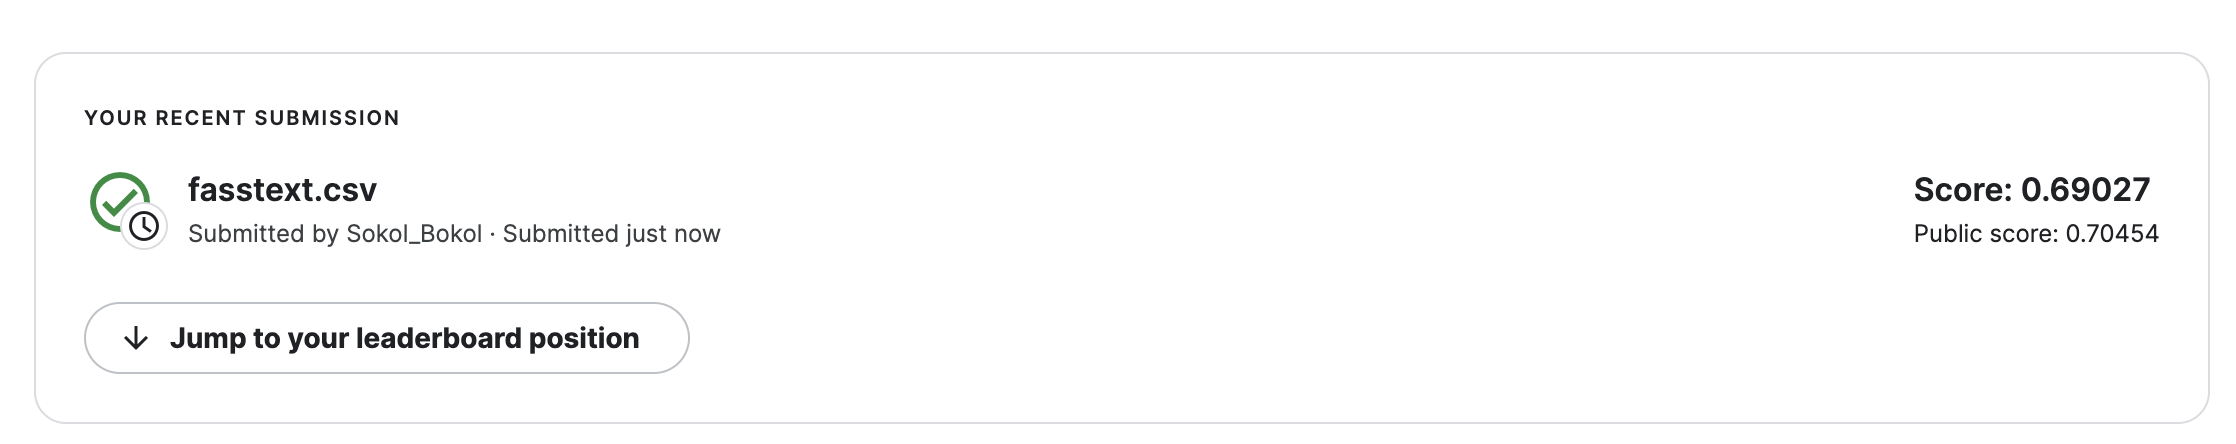

**Вывод:** используем это число как baseline

## CNN

In [166]:
import torch
from torchtext.legacy import data
from torchtext.legacy import datasets
from torchtext.vocab import build_vocab_from_iterator
from torch import nn
import torch.optim as optim
from torch.nn import functional as F

from itertools import product
import pymorphy2
import re

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.preprocessing import LabelEncoder

import warnings 
warnings.filterwarnings('ignore')


In [149]:
SEED = 0
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
tqdm.pandas()

In [150]:
m = pymorphy2.MorphAnalyzer() 

def lemmatize(text, pymorphy=m):
    try:
        return " ".join([pymorphy.parse(w)[0].normal_form for w in text])
    except:
        return " "    
    

def dataset_iterator(texts):
    for text in texts:
        yield text.split()

In [151]:
## lemmatize text

df['text_lemmatized'] = df['text_tokenized'].progress_apply(lambda x : lemmatize(x))
df_kaggle['text_lemmatized'] = df_kaggle['text_tokenized'].progress_apply(lambda x : lemmatize(x))

  0%|          | 0/8263 [00:00<?, ?it/s]

  0%|          | 0/2056 [00:00<?, ?it/s]

In [299]:
## составляем словарь всех слов, неизвестные меняем на unk, добавляем паддинг

vocab = build_vocab_from_iterator(
    dataset_iterator(df['text_lemmatized']),
    specials=['<pad>', '<unk>'], min_freq=10,
)

df_train, df_test = train_test_split(df, test_size=0.2)

In [300]:
## создаем токены для всех датасетов, для неизвестных слов проставляем unk

train_tokens = []
for text in dataset_iterator(df_train['text_lemmatized']):
    tokens = [vocab[word] if word in vocab else vocab['<unk>'] for word in text]
    train_tokens += [tokens]

test_tokens = []
for text in dataset_iterator(df_test['text_lemmatized']):
    tokens = [vocab[word] if word in vocab else vocab['<unk>'] for word in text]
    test_tokens += [tokens]
    
kaggle_tokens = []
for text in dataset_iterator(df_kaggle['text_lemmatized']):
    tokens = [vocab[word] if word in vocab else vocab['<unk>'] for word in text]
    kaggle_tokens += [tokens]

In [301]:
## добиваем векторы до одинаковой длины (padding=300)

max_length = 300
tokenized_train = torch.full((len(train_tokens), max_length), vocab['<pad>'], dtype=torch.int32)
for i, tokens in enumerate(train_tokens):
    length = min(max_length, len(tokens))
    tokenized_train[i, :length] = torch.tensor(tokens[:length])

tokenized_test = torch.full((len(test_tokens), max_length), vocab['<pad>'], dtype=torch.int32)
for i, tokens in enumerate(test_tokens):
    length = min(max_length, len(tokens))
    tokenized_test[i, :length] = torch.tensor(tokens[:length])
    
tokenized_kaggle = torch.full((len(kaggle_tokens), max_length), vocab['<pad>'], dtype=torch.int32)
for i, tokens in enumerate(kaggle_tokens):
    length = min(max_length, len(tokens))
    tokenized_kaggle[i, :length] = torch.tensor(tokens[:length])
    
    

In [302]:
## dataset for CNN

class MyDataset(Dataset):
    def __init__(self, X, y):
        self.y = torch.tensor(y)
        self.X = torch.tensor(X)

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, i): 
        return self.X[i], self.y[i]

In [303]:
## переведем строковые значения таргета в числовые

lenc = LabelEncoder()
df_train['sentiment'] = lenc.fit_transform(df_train['sentiment'])
df_test['sentiment'] = lenc.transform(df_test['sentiment'])
df_kaggle['sentiment'] = 0

In [304]:
## создаем датасеты для 

torch.manual_seed(101)

batch_size = 128

train_dataset = MyDataset(
    tokenized_train,
    df_train['sentiment'].values
)
test_dataset = MyDataset(
    tokenized_test,
    df_test['sentiment'].values
)

kaggle_dataset = MyDataset(
    tokenized_kaggle,
    df_kaggle['sentiment'].values
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)
kaggle_loader = DataLoader(kaggle_dataset, batch_size=512, shuffle=False)

X, y = next(iter(train_loader))

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: torch.Size([128, 300])
Target shape: torch.Size([128])


In [305]:
## динамический подсчет accuracy

def binary_accuracy(preds, y):
    rounded_preds = torch.round(F.sigmoid(preds))
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc

## функция обучения
def train_func(model, iterator, optimizer, criterion):
    epoch_loss = 0
    epoch_acc = 0
    
    ## режим обучения
    model.train()
    
    ## проходим по батчам
    for text, label in tqdm(iterator, leave=False):
        ## зануляем градиент
        optimizer.zero_grad()
        ## предсказания в вероятностях
        logits = model(text)
        ## считаем лосс
        loss = criterion(logits, label.long())
        ## вычисляем accuracy
        acc = (logits.argmax(dim=-1) == label).sum().item()
        
        ## обратное распространение ошибки
        loss.backward()
        ## шаг оптимизатора
        optimizer.step()
        
        epoch_loss += loss.item() * text.shape[0]
        epoch_acc += acc
        
    return epoch_loss / len(iterator.dataset), epoch_acc / len(iterator.dataset)

## функция валидации
def evaluate_func(model, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0
    
    ## режим валидации
    model.eval()
    
    ## не меняем градиент
    with torch.no_grad():
        ## по батчам
        for text, label in tqdm(iterator, leave=False):
            ## предсказания, ...
            logits = model(text)
            loss = criterion(logits, label.long())
            acc = (logits.argmax(dim=-1) == label).sum().item()
            

            epoch_loss += loss.item() * text.shape[0]
            epoch_acc += acc
        
    return epoch_loss / len(iterator.dataset), epoch_acc / len(iterator.dataset)

## функция получения предсказаний
def predict(model, iterator):
    model.eval()
    predictions = torch.Tensor()
    with torch.no_grad():
        for text, label in tqdm(iterator, leave=False):
            logits = model(text)
            predictions_ = logits.argmax(dim=-1)
            predictions = torch.cat([predictions, predictions_])
            
    return np.array(predictions).astype(int)

## наша моделечка, сам себе СИ-ЭН-ЭН
## взято с семинара, очень понравилось
class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, dropout):
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.conv_0 = nn.Conv2d(in_channels=1, out_channels=n_filters, kernel_size=(filter_sizes[0], embedding_dim))
        self.conv_1 = nn.Conv2d(in_channels=1, out_channels=n_filters, kernel_size=(filter_sizes[1], embedding_dim))
        self.conv_2 = nn.Conv2d(in_channels=1, out_channels=n_filters, kernel_size=(filter_sizes[2], embedding_dim))
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        embedded = self.embedding(x)
        embedded = embedded.unsqueeze(1)
        ## слои
        conved_0 = F.relu(self.conv_0(embedded).squeeze(3))
        conved_1 = F.relu(self.conv_1(embedded).squeeze(3))
        conved_2 = F.relu(self.conv_2(embedded).squeeze(3))
        pooled_0 = F.max_pool1d(conved_0, conved_0.shape[2]).squeeze(2)
        pooled_1 = F.max_pool1d(conved_1, conved_1.shape[2]).squeeze(2)
        pooled_2 = F.max_pool1d(conved_2, conved_2.shape[2]).squeeze(2)
        cat = self.dropout(torch.cat((pooled_0, pooled_1, pooled_2), dim=1))
        return self.fc(cat)

In [182]:
## гиперпараметры

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 100
N_FILTERS = 100
FILTER_SIZES = [3, 4, 5]
LEARNING_RATE = 1e-3
N_EPOCHS = 5

## 3 класса
OUTPUT_DIM = 3
DROPOUT = 0.2

## создаем модель
model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT)

## оптимизатор и функция потерь
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

In [183]:
for epoch in range(N_EPOCHS):
    train_loss, train_acc = train_func(model, train_loader, optimizer, criterion)
    valid_loss, valid_acc = evaluate_func(model, test_loader, criterion)
    
    print(f'Epoch: {epoch+1:02}, Train Loss: {train_loss:.3f}, Train Acc: {train_acc*100:.2f}%, Val. Loss: {valid_loss:.3f}, Val. Acc: {valid_acc*100:.2f}%')

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 01, Train Loss: 1.027, Train Acc: 49.09%, Val. Loss: 0.856, Val. Acc: 56.26%


  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 02, Train Loss: 0.782, Train Acc: 63.98%, Val. Loss: 0.810, Val. Acc: 65.03%


  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 03, Train Loss: 0.659, Train Acc: 72.04%, Val. Loss: 0.740, Val. Acc: 67.15%


  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 04, Train Loss: 0.582, Train Acc: 76.34%, Val. Loss: 0.751, Val. Acc: 63.94%


  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 05, Train Loss: 0.512, Train Acc: 80.14%, Val. Loss: 0.706, Val. Acc: 67.76%


In [184]:
y_pred = predict(model, test_loader)
print('Macro F1:', f1_score(df_test['sentiment'], y_pred, average='macro'))

  0%|          | 0/4 [00:00<?, ?it/s]

Macro F1: 0.650681111296215


### param fitting

In [306]:
## Перебор параметров для поиска наилучших.

def search_params(n_filters = [50, 100], filter_sizes = [[3, 4, 5], [4, 5, 6]]):
    
    best_params = {}
    INPUT_DIM = len(vocab)
    EMBEDDING_DIM = 100
    OUTPUT_DIM = 3 ## now it is n_classes
    DROPOUT = 0.2
    LEARNING_RATE = 1e-2
    N_EPOCHS = 4
    
    
    for N_FILTER, FILTER_SIZE in tqdm(list(product(n_filters, filter_sizes))):
        model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTER, FILTER_SIZE, OUTPUT_DIM, DROPOUT)
        optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
        criterion = nn.CrossEntropyLoss()
        

        for epoch in range(N_EPOCHS):
            train_loss, train_acc = train_func(model, train_loader, optimizer, criterion)
            
        y_pred = predict(model, test_loader)
        score = f1_score(df_test['sentiment'], y_pred, average='macro')
        print(f'N_FILTERS {N_FILTER}, FILTER_SIZES {FILTER_SIZE}, SCORE: {score}')
        
        
        if best_params == {} or score > best_params['BEST_SCORE']:
            best_params['N_FILTERS'] = N_FILTER
            best_params['FILTER_SIZES'] = FILTER_SIZE
            best_params['BEST_SCORE'] = score
        
    
    return best_params
        

In [307]:
n_filters = [50, 100] 
filter_sizes = [[3, 4, 5], [4, 5, 6]]

best_params = search_params(n_filters, filter_sizes)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

N_FILTERS 50, FILTER_SIZES [3, 4, 5], SCORE: 0.5895320756795898


  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

N_FILTERS 50, FILTER_SIZES [4, 5, 6], SCORE: 0.6832379326425837


  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

N_FILTERS 100, FILTER_SIZES [3, 4, 5], SCORE: 0.6627439168973247


  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

N_FILTERS 100, FILTER_SIZES [4, 5, 6], SCORE: 0.6926485088143893


In [308]:
## обучаем модель с оптимальными параметрами

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 100
N_FILTERS = best_params['N_FILTERS']
FILTER_SIZES = best_params['FILTER_SIZES']
LEARNING_RATE = 1e-2
N_EPOCHS = 4
OUTPUT_DIM = 3
DROPOUT = 0.2

model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT)

optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

for epoch in range(N_EPOCHS):
    train_loss, train_acc = train_func(model, train_loader, optimizer, criterion)

y_kaggle = predict(model, kaggle_loader)
df_kaggle['sentiment'] = lenc.inverse_transform(y_kaggle)
df_kaggle[['id', 'sentiment']].to_csv('best_cnn.csv', index=False)

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

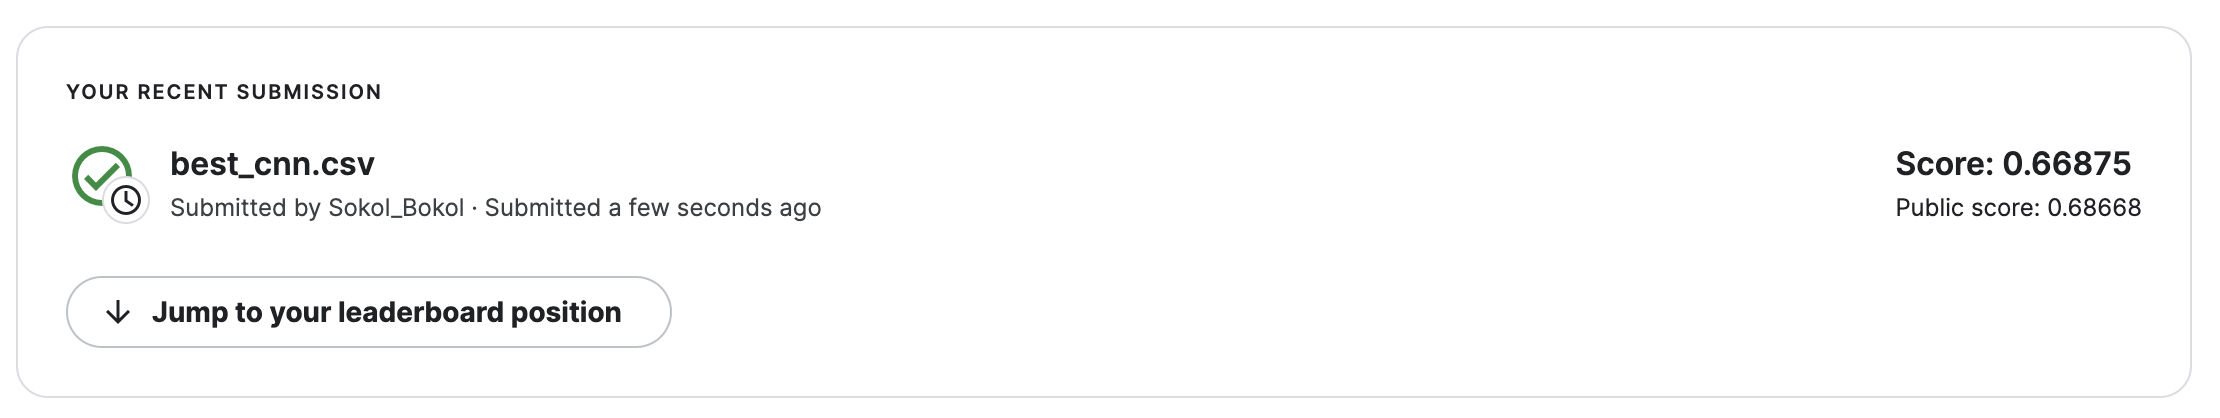

## Augmentation

In [ ]:
## меняем соседние слова местами

def swap_augm(x):
    a = np.array(x.split())
    a = np.concatenate([(a[1::2][i], a[::2][i]) for i in range(a.shape[0] // 2)])
    
    return " ".join(a)

## удаляем слова из предложения с вероятностью p
def delete_augm(x):
    p = 0.2
    
    res = np.array([])
    a = np.array(x.split())
    for i in range(a.shape[0]):
        n = np.random.random()
        if n < 1 - p:
            res = np.append(res, a[i])
    
    
    return " ".join(res)

In [280]:
df_copy = df.copy()
df_train, df_test = train_test_split(df_copy, test_size=0.33)
df_train['text_augmentated1'] = df_train['text_lemmatized'].progress_apply(lambda x: swap_augm(x))
df_train['text_augmentated2'] = df_train['text_lemmatized'].progress_apply(lambda x: delete_augm(x))
df_train = pd.concat([df_train,
           df_train[['sentiment', 'text_augmentated1']].rename(columns={'text_augmentated1': 'text_lemmatized'}),
          df_train[['sentiment', 'text_augmentated2']].rename(columns={'text_augmentated2': 'text_lemmatized'})], axis=0)



  0%|          | 0/5536 [00:00<?, ?it/s]

  0%|          | 0/5536 [00:00<?, ?it/s]

In [281]:
X_train, X_test, y_train, y_test =\
np.array(df_train['text_lemmatized']), np.array(df_test['text_lemmatized']),\
np.array(df_train['sentiment']), np.array(df_test['sentiment'])

print("total train examples %s" % len(y_train))
print("total test examples %s" % len(y_test))

total train examples 16608
total test examples 2727


In [282]:
## запишем полученные выборки в файлы

with open('data.train.txt', 'w+', encoding='utf-8') as outfile:
    for i in range(len(X_train)):
        outfile.write('__label__' + y_train[i] + ' '+ X_train[i] + '\n')
    

with open('dev.txt', 'w+', encoding='utf-8') as outfile:
    for i in range(len(X_test)):
        outfile.write('__label__' + y_test[i] + ' ' + X_test[i] + '\n')

In [283]:
## обучим fasttext и измерим скор

classifier = fasttext.train_supervised('data.train.txt', epoch=15)

y_pred = classifier.predict(X_test.tolist())
print('Macro F1:', f1_score(np.array(list(map(lambda x : "__label__" + x, y_test))),
                            np.array(y_pred[0]).squeeze(), average='macro'))

Read 6M words
Number of words:  71834
Number of labels: 3
Progress: 100.0% words/sec/thread: 2654031 lr:  0.000000 avg.loss:  0.334485 ETA:   0h 0m 0s 45.8% words/sec/thread: 2663392 lr:  0.054206 avg.loss:  0.502374 ETA:   0h 0m 2s


Macro F1: 0.6919177892081011


## bonus experiments

In [284]:
from xgboost import XGBClassifier

In [291]:
w2v = word2vec.Word2Vec(sentences=df['text_lemmatized'].str.split())

In [292]:
## create mean sentence vector

def avg_word_vectors(w2v, wordlist):
    sumvec = np.zeros(shape=(1, w2v.vector_size))
    cnt = 0
    for w in wordlist:
        if w in w2v.wv.key_to_index:
            sumvec += w2v.wv[w]
            cnt += 1
    if cnt == 0:
        cnt = 1
    return sumvec / cnt

In [293]:
X = df['text_lemmatized'].str.split()
y = df['sentiment']

X = np.concatenate(X.apply(lambda x : avg_word_vectors(w2v, x)).values)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [294]:
model = XGBClassifier()
model.fit(X_train, y_train)

[23:22:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [295]:
y_pred = model.predict(X_test)
print('Macro F1:', f1_score(y_test, y_pred, average='macro'))

Macro F1: 0.6601841686995129


## Часть 4. [1 балл] Итоги
Напишите краткое резюме проделанной работы. Обобщите все полученные вами результаты и сделайте выводы.

Проведя анализ текстов, мы выяснили что главной их тематикой является внутренняя экономика казахстана 2016 года. Мы обнаружили, что характерной чертой негативного класса было употребление слова "енпф".

В качестве модели представления слов был выбран Word2Vec. Для проверки корректности ее обучения на наших данных, мы визуализировали результаты помощью TSNE и посмотрели на синонимы и удаление лишних слов.

Для псоледующих экспериментов мы проводили очистку текста с помощью удаления стоп слов и пунктуации для уменьшения "шумности" текста, а так же примененяли лемматизацию для приведения слов к нормальной форме.

В качестве бейслайна был выбран классификатор fasttext. Полученный скор на валидации и на kaggle boardе составил 0.69


В качестве продвинутого классификатора была написана свою сверточная сеть, состояющая из 3 сверточных слоев, Relu между ними, а также Linear и Dropout слоев. Был произведен перебор фильтров для CNN, найдены лучшие значения и получены предсказания с момощью модели с этими параметрами. F1 score на валидации получился равным 0.69, а в соревновании kaggle - 0.66, что хуже чем у fasttext.

В качестве аугментации мы решили добавить случайное удаление слов из текстов с вероятностью p, а также перестановку соседнгих слов. Аугментация не дала прироста в качестве.

Бонусный эксперимент проводился с использованием XGBCLassifier из библиотеки xgboost. Полученный скор - 0.66, что хуже чем во всех ранее описанных экспериментах.

